<a href="https://colab.research.google.com/github/KhamessiTaha/ALPR/blob/main/Shell_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

#Loding data

In [3]:
demand = pd.read_csv('/content/drive/MyDrive/Shell.ai/dataset/demand.csv')
vehicles = pd.read_csv('/content/drive/MyDrive/Shell.ai/dataset/vehicles.csv')
vehicles_fuels = pd.read_csv('/content/drive/MyDrive/Shell.ai/dataset/vehicles_fuels.csv')
fuels = pd.read_csv('/content/drive/MyDrive/Shell.ai/dataset/fuels.csv')
carbon_emissions = pd.read_csv('/content/drive/MyDrive/Shell.ai/dataset/carbon_emissions.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Shell.ai/dataset/sample_submission.csv')

In [4]:
print("Demand Data:")
demand.head()

Demand Data:


,Year,Size,Distance,Demand (km)
0,2023,S1,D1,869181
1,2023,S1,D2,2597094
2,2023,S1,D3,3292011
3,2023,S1,D4,414315
4,2023,S2,D1,995694


In [5]:
print("Vehicles Data:")
vehicles.head()

Vehicles Data:


,ID,Vehicle,Size,Year,Cost ($),Yearly range (km),Distance
0,BEV_S1_2023,BEV,S1,2023,187000,102000,D1
1,BEV_S1_2024,BEV,S1,2024,177650,102000,D1
2,BEV_S1_2025,BEV,S1,2025,168767,102000,D1
3,BEV_S1_2026,BEV,S1,2026,160329,102000,D2
4,BEV_S1_2027,BEV,S1,2027,152312,102000,D2


In [6]:
print("Vehicles Fuels Data:")
vehicles_fuels.head()

Vehicles Fuels Data:


,ID,Fuel,Consumption (unit_fuel/km)
0,BEV_S1_2023,Electricity,0.893043
1,BEV_S1_2024,Electricity,0.893043
2,BEV_S1_2025,Electricity,0.893043
3,BEV_S1_2026,Electricity,0.893043
4,BEV_S1_2027,Electricity,0.868161


In [7]:
print("Fuels Data:")
fuels.head()

Fuels Data:


,Fuel,Year,Emissions (CO2/unit_fuel),Cost ($/unit_fuel),Cost Uncertainty (±%)
0,B20,2023,3.04858,1.220845,0
1,B20,2024,3.04858,1.246802,2
2,B20,2025,3.04858,1.273310,4
3,B20,2026,3.04858,1.300382,6
4,B20,2027,3.04858,1.328030,8


In [8]:
print("Carbon Emissions Data:")
carbon_emissions.head()

Carbon Emissions Data:


,Year,Carbon emission CO2/kg
0,2023,11677957
1,2024,10510161
2,2025,9459145
3,2026,8513230
4,2027,7661907


In [10]:
print("Submission sample :")
sample_submission.head()

Submission sample :


,Year,ID,Num_Vehicles,Type,Fuel,Distance_bucket,Distance_per_vehicle(km)
0,2023,BEV_S1_2023,3,Buy,NaN,NaN,0.0
1,2023,Diesel_S1_2023,36,Buy,NaN,NaN,0.0
2,2023,LNG_S1_2023,34,Buy,NaN,NaN,0.0
3,2023,BEV_S2_2023,4,Buy,NaN,NaN,0.0
4,2023,Diesel_S2_2023,15,Buy,NaN,NaN,0.0


#Feature Analysis

**Demand.csv**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot total demand per year

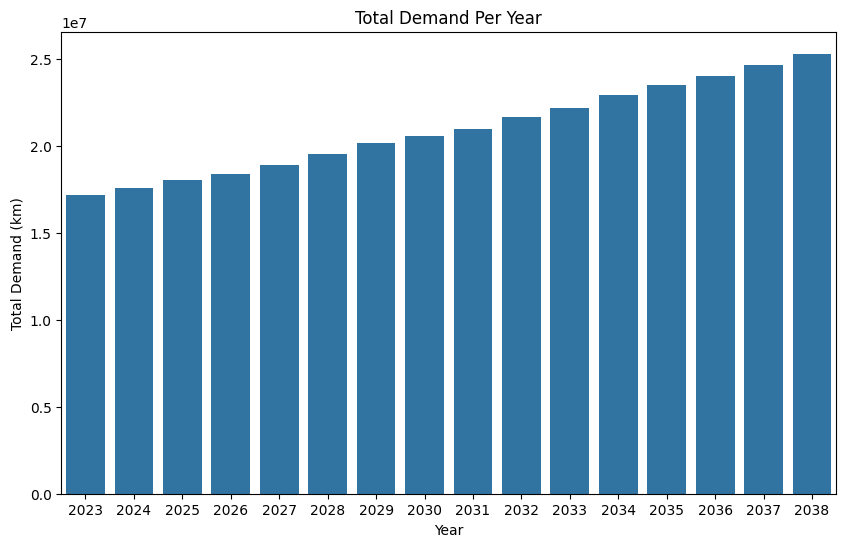

In [13]:
demand_yearly = demand.groupby('Year').sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Demand (km)', data=demand_yearly)
plt.title('Total Demand Per Year')
plt.xlabel('Year')
plt.ylabel('Total Demand (km)')
plt.show()

Plot demand per vehicle size

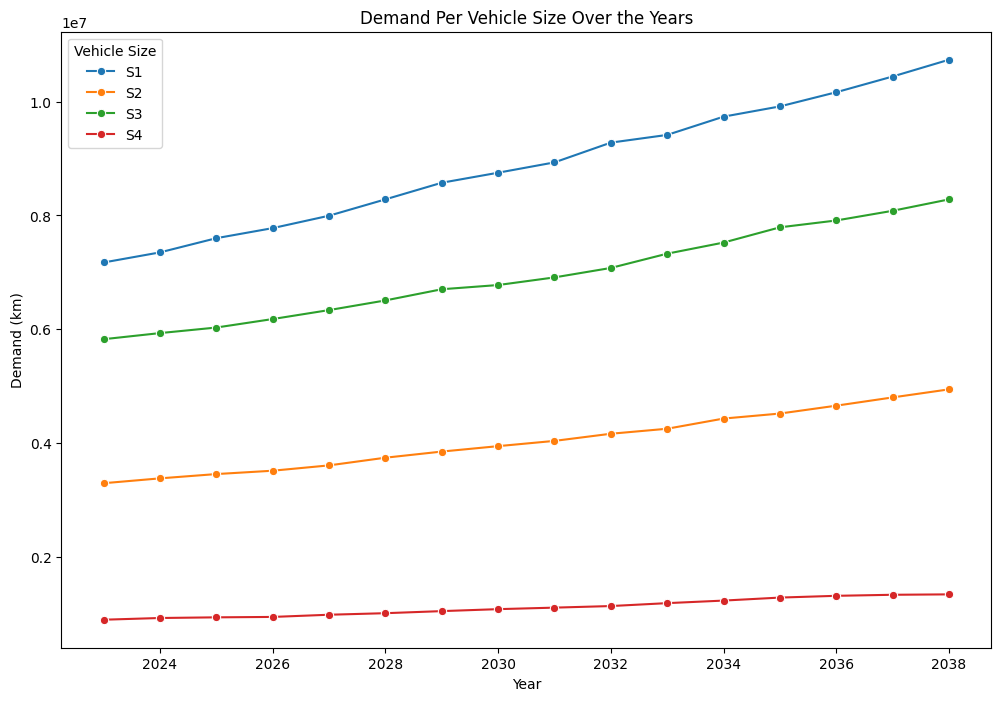

In [14]:
demand_size = demand.groupby(['Year', 'Size']).sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Demand (km)', hue='Size', data=demand_size, marker='o')
plt.title('Demand Per Vehicle Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Demand (km)')
plt.legend(title='Vehicle Size')
plt.show()


Plot demand per distance bucket

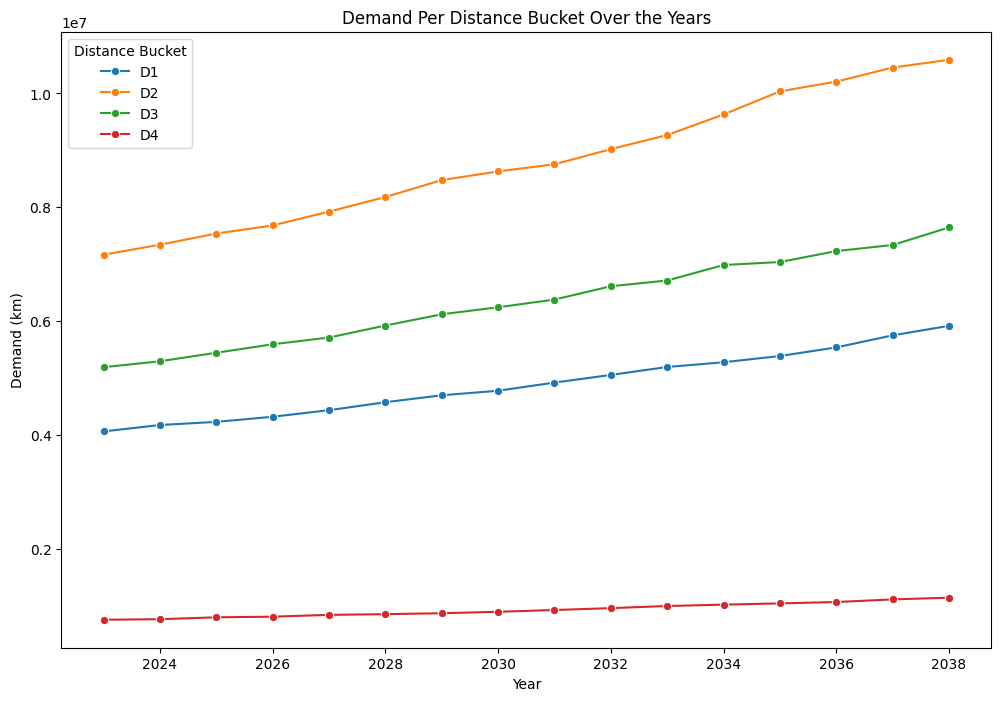

In [15]:
demand_distance = demand.groupby(['Year', 'Distance']).sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Demand (km)', hue='Distance', data=demand_distance, marker='o')
plt.title('Demand Per Distance Bucket Over the Years')
plt.xlabel('Year')
plt.ylabel('Demand (km)')
plt.legend(title='Distance Bucket')
plt.show()

**Vehicles.csv**

Plot vehicle cost distribution

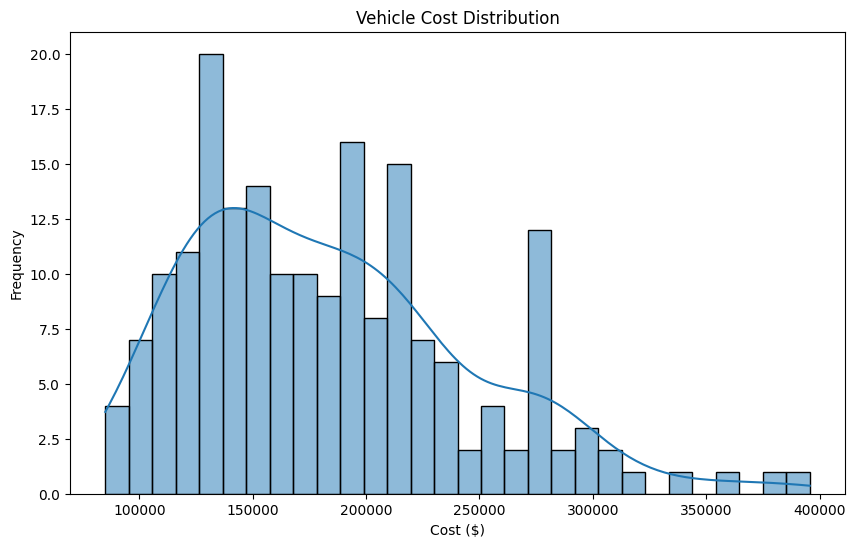

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(vehicles['Cost ($)'], bins=30, kde=True)
plt.title('Vehicle Cost Distribution')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.show()

yearly range by distance bucket

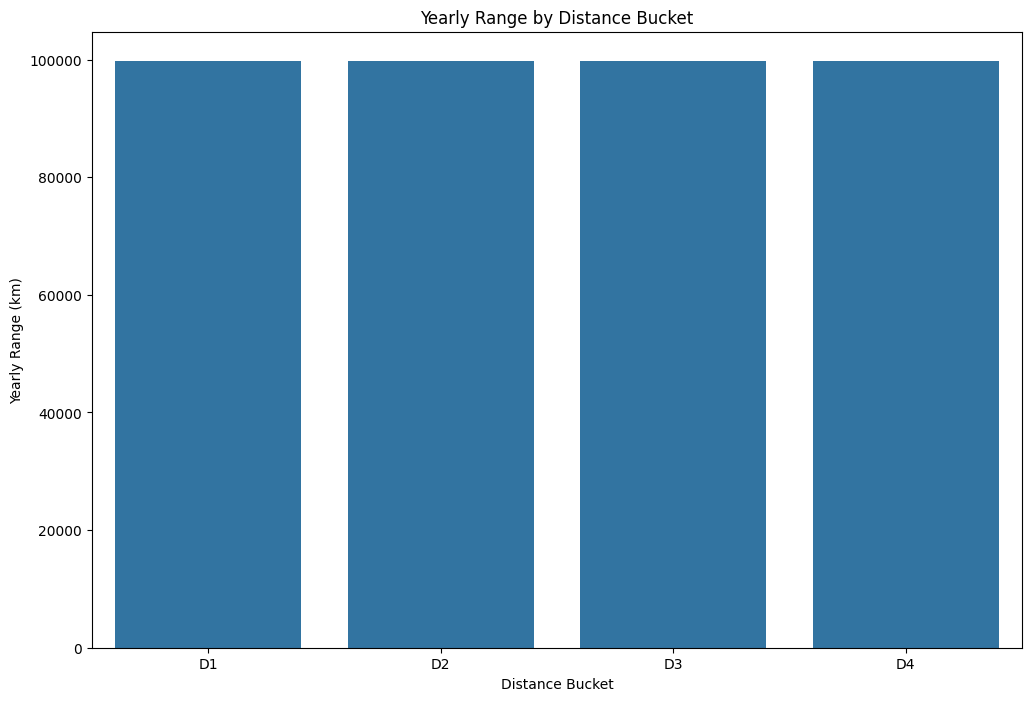

In [20]:
vehicles_distance = vehicles.groupby('Distance')['Yearly range (km)'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Distance', y='Yearly range (km)', data=vehicles_distance)
plt.title('Yearly Range by Distance Bucket')
plt.xlabel('Distance Bucket')
plt.ylabel('Yearly Range (km)')
plt.show()

fuel consumption distribution

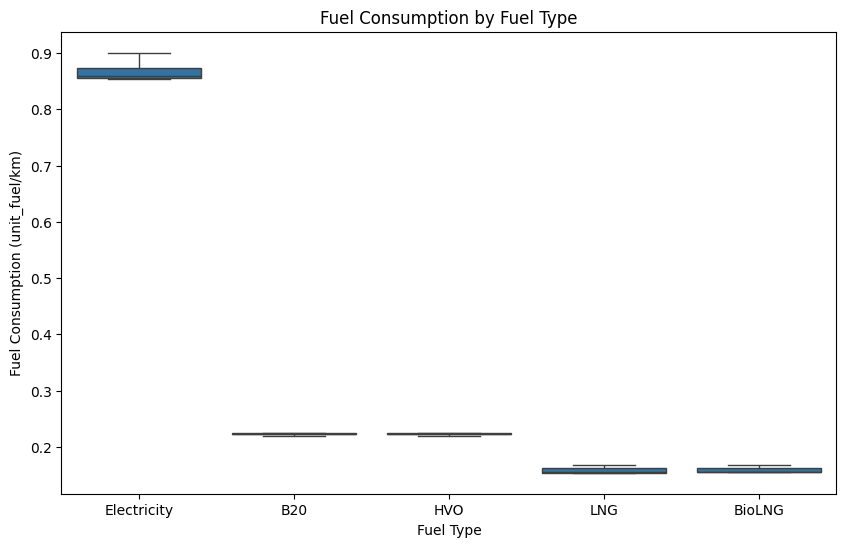

In [21]:
vehicles_fuel_data = vehicles.merge(vehicles_fuels, on='ID')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='Consumption (unit_fuel/km)', data=vehicles_fuel_data)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (unit_fuel/km)')
plt.show()

#**Carbon Emissions Analysis**

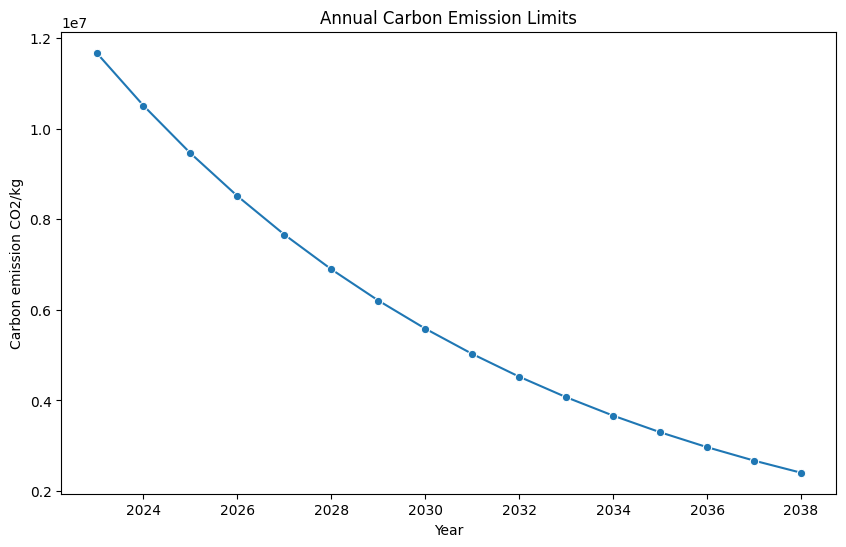

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Carbon emission CO2/kg', data=carbon_emissions, marker='o')
plt.title('Annual Carbon Emission Limits')
plt.xlabel('Year')
plt.ylabel('Carbon emission CO2/kg')
plt.show()